In [28]:
import numpy as np
import os

import subprocess
from subprocess import Popen


base_path = '/home/b502b586/ardupilot-workspace/experiments'
os.chdir(base_path)

save_dir = '%s/saved_results' % base_path
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
save_enabled = True

# experiment_path = './exp-f:700-bw:6-video:1280p'

# if not os.path.exists(experiment_path):
#     os.makedirs(experiment_path)
# os.chdir(experiment_path)

In [2]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

valid_frequencies = ["700", "1500", "2600"]
valid_bw = ["6", "15", "25", "50", "75", "100"]
valid_scenarios = ["UMa", "UMi", "RMa"]
valid_video_qualities = ["800p", "1280p", "1920p"]
valid_fr_algs = ["ns3::LteFrNoOpAlgorithm", "ns3::LteFrHardAlgorithm", "ns3::LteFrStrictAlgorithm", 
                 "ns3::LteFrSoftAlgorithm", "ns3::LteFfrSoftAlgorithm", "ns3::LteFfrEnhancedAlgorithm"]

In [3]:
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 20, })

In [78]:
def extract_video_throuput(video_0):
    rx_rows = np.where(video_0[:, 1] == 'rx')
    tx_rows = np.where(video_0[:, 1] == 'tx')

    rx_info = video_0[rx_rows][:, [0, 2]]
    tx_info = video_0[tx_rows][:, [0, 2]]


    tx_sum_rate = 8 * np.array([np.sum(tx_info[np.where(np.array(tx_info[:, 0], dtype=int) == i), 1]) for i in
                                range(int(np.max(tx_info[:, 0])))])

    if rx_info.shape[0] > 0:
        rx_sum_rate = 8 * np.array([np.sum(rx_info[np.where(np.array(rx_info[:, 0], dtype=int) == i), 1]) for i in
                                    range(int(np.max(rx_info[:, 0])))])
    else:
        rx_sum_rate = np.zeros_like(tx_sum_rate)

    return np.arange(rx_sum_rate.shape[0]), rx_sum_rate / (2 ** 20), np.arange(tx_sum_rate.shape[0]), tx_sum_rate / (
            2 ** 20)

def smooth(rx_sum_rate):
    window_size = 50

    rx_data = pd.Series(rx_sum_rate)
    windows = rx_data.rolling(window_size)
    rx_sum_rate = windows.mean()
    
    return np.arange(rx_sum_rate.shape[0]), rx_sum_rate

In [5]:
def extract_loc_data(mob_0):
    node_0_data = mob_0[np.argwhere(mob_0[:, 1] == 0)[:, 0]]
    node_0_loc = np.array([r.split(':') for r in node_0_data[:, 2]], dtype=float)
    node_0_t = node_0_data[:, 0]
    return node_0_t, node_0_loc

In [6]:
def get_distanc(node_0_loc):
    diff = np.subtract(node_0_loc, node_0_loc[0])
    diff2D = diff[:, :2] ** 2
    diff2D = np.sum(diff2D, axis=1)
    diff2D = np.sqrt(diff2D)
    return diff2D

In [7]:
def extract_dl_info(rma2000):
    t = rma2000[:, 0]
    rsrp = 10 * np.log10(rma2000[:, 4])
    sinr = 10 * np.log10(rma2000[:, 5])
    return t, rsrp, sinr


def extract_ul_sinr(rma2000):
    t = rma2000[:, 0]
    sinr = 10 * np.log10(rma2000[:, 4])
    return t, sinr

In [8]:
# os.chdir(experiment_path)

def extract_delay_data(telemetry_data):
    node_0_data = telemetry_data[np.argwhere(np.array(telemetry_data[:, 1], dtype=int) == 1)[:, 0]]
    node_0_delay = node_0_data[:, 4]
    node_0_t = node_0_data[:, 0]
    return node_0_t, node_0_delay

In [9]:
print(experiment_path)

NameError: name 'experiment_path' is not defined

In [29]:
############### Comparing Different Experiments with eachothers ##################
os.chdir(base_path)
save_format = "png"
experiments_path = ['exp-f:700-bw:6-video:800p',
                    'exp-f:700-bw:6-video:1280p',
                    'exp-f:700-bw:6-video:1920p',
                    'exp-f:700-bw:15-video:1920p',
                    'exp-f:700-bw:25-video:1920p',
                    
                    'exp-f:1500-bw:15-video:800p',
                    'exp-f:1500-bw:15-video:1280p',
                    'exp-f:1500-bw:15-video:1920p',
                    'exp-f:1500-bw:25-video:1920p',
                    
                    'exp-f:2600-bw:50-video:800p',
                    'exp-f:2600-bw:50-video:1280p',
                    'exp-f:2600-bw:50-video:1920p',
                    'exp-f:2600-bw:25-video:1920p',
                    'exp-f:2600-bw:75-video:1920p',
                   ]
# experiments_freq = ['700 MHz', '700 MHz', '700 MHz', '1500 MHz', '1500 MHz', '1500 MHz', '2600 MHz']
# experiments_bw = ['6 MHz', '6 MHz', '6 MHz', '15 MHz', '15 MHz', '15 MHz', '50 MHz']
# experiments_vq = ['880p', '1280p', '1920p', '880p', '1280p', '1920p', '880p']

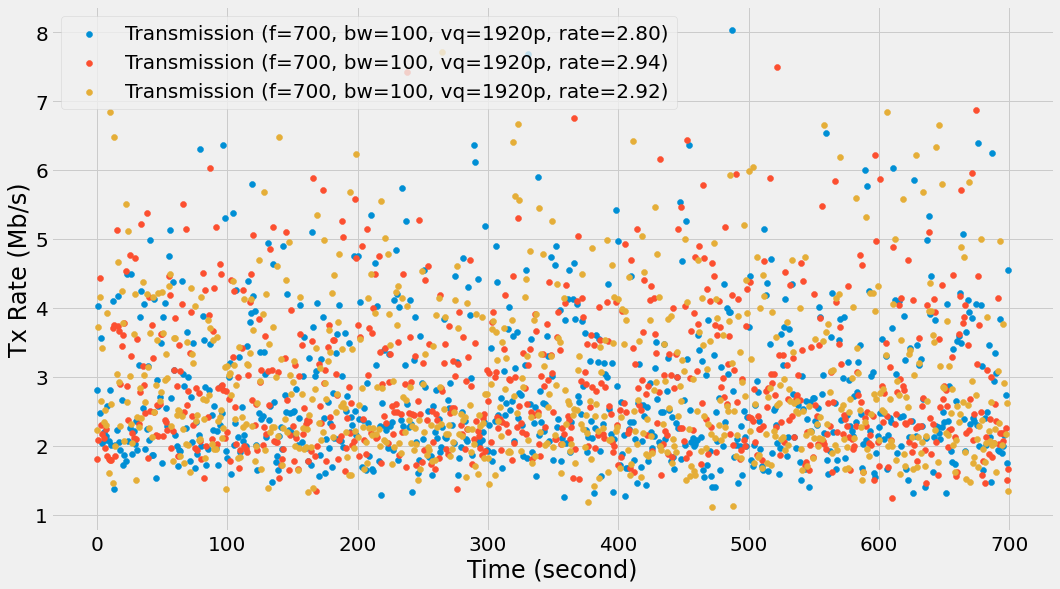

In [79]:
# Analyse effect of video resolution on transmission rate
experiments_path = [
    # 'exp-f:700-bw:15-video:800p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt',
    # 'exp-f:700-bw:50-video:800p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt',
    # 'exp-f:700-bw:100-video:800p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt',
    # 'exp-f:700-bw:15-video:1280p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt',
    # 'exp-f:700-bw:15-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt',
    
    
    # 'exp-f:700-bw:6-video:1920p-fr:LteFfrSoftAlgorithm',
    
    # 'exp-f:700-bw:15-video:1280p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:700-bw:15-video:1920p-fr:LteFrNoOpAlgorithm',
    
#     'exp-f:700-bw:25-video:1920p-fr:LteFrNoOpAlgorithm',
#     'exp-f:700-bw:25-video:1920p-fr:LteFfrSoftAlgorithm',
    
#     'exp-f:700-bw:50-video:1920p-fr:LteFrNoOpAlgorithm',
#     'exp-f:700-bw:50-video:1920p-fr:LteFfrSoftAlgorithm',
    
#     'exp-f:700-bw:100-video:1920p-fr:LteFfrSoftAlgorithm',
#     'exp-f:700-bw:100-video:1920p-fr:LteFrNoOpAlgorithm',
    

    # 'exp-f:1500-bw:15-video:800p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:1500-bw:15-video:1280p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:1500-bw:15-video:1920p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:1500-bw:25-video:1920p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:1500-bw:50-video:1920p-fr:LteFrNoOpAlgorithm',
    
    # 'exp-f:2600-bw:15-video:1280p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:2600-bw:15-video:1920p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:2600-bw:25-video:1920p-fr:LteFrNoOpAlgorithm',
#     'exp-f:2600-bw:50-video:800p-fr:LteFrNoOpAlgorithm',
#     'exp-f:2600-bw:50-video:1280p-fr:LteFrNoOpAlgorithm',
#     'exp-f:2600-bw:50-video:1920p-fr:LteFrNoOpAlgorithm',
    'exp-f:700-bw:100-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt-nbUAVs:1-useCA:false-nbCC:1-scenario:RMa-nbENB:1-run:0',
    'exp-f:700-bw:100-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt-nbUAVs:1-useCA:false-nbCC:1-scenario:RMa-nbENB:3-run:0',
    'exp-f:700-bw:100-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt-nbUAVs:1-useCA:false-nbCC:1-scenario:RMa-nbENB:5-run:0',
    # 'exp-f:2600-bw:100-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt-nbUAVs:3-useCA:false-nbCC:1',
    # 'exp-f:2600-bw:100-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt-nbUAVs:5-useCA:false-nbCC:1',
    # 'exp-f:2600-bw:100-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt-nbUAVs:10-useCA:false-nbCC:1',
    # 'exp-f:2600-bw:100-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt-nbUAVs:15-useCA:false-nbCC:1',
]

save_path = 'Transmission-Throughput-DiffVideo-F:%s-BW:' % experiments_path[0][experiments_path[0].find('f:') + 2: experiments_path[0].find('-bw')]

mu = []
fig, ax = plt.subplots(figsize=(16, 9))
for i, path in enumerate(experiments_path):
    try:
        video_0 = pd.read_csv('./%s/VideoPacketTrace.txt' % path, delimiter='\t').to_numpy()
    except:
        video_0 = pd.read_csv('./%s/uav-1-VideoPacketTrace.txt' % path, delimiter='\t').to_numpy()
    
    freq = path[path.find('f:') + 2: path.find('-bw')]
    bw = path[path.find('-bw:') + 4:path.find('-video')]
    video_quality = path[path.find('-video:') + 7:path.find('-fr:')]
    fr_alg = path[path.find('-fr:') + 4:]
    
    save_path += bw + ","

    rx_t, rx_sum_rate, tx_t, tx_sum_rate = extract_video_throuput(video_0)  # 6 mhz

    smoothed_rx_t, smoothed_rx_sum_rate = smooth(rx_sum_rate)
    smoothed_tx_t, smoothed_tx_sum_rate = smooth(tx_sum_rate)

    # plt.scatter(smoothed_rx_t, smoothed_rx_sum_rate, label='Reception (f=%s, bw=%s, vq=%s, rate=%.2f)' % (freq, bw, video_quality, rx_sum_rate.mean()))
    plt.scatter(tx_t, tx_sum_rate, label='Transmission (f=%s, bw=%s, vq=%s, rate=%.2f)' % (freq, bw, video_quality, tx_sum_rate.mean()))
    
    # plt.scatter(smoothed_rx_t, smoothed_rx_sum_rate, label='Reception')
    # plt.scatter(smoothed_tx_t, smoothed_tx_sum_rate, label='Transmission')
    # mu.append('$Avg. TX \, Rate=%.2f Mb/s, \quad STD=%.2f$' % (tx_sum_rate.mean(), tx_sum_rate.std()))
    mu.append('$Avg. RX \, Rate=%.2f Mb/s, \quad STD=%.2f$' % (tx_sum_rate.mean(), tx_sum_rate.std()))

    
# handles, labels = ax.get_legend_handles_labels()
# first_legend = ax.legend(handles, mu, loc='center')
# ax.add_artist(first_legend)

plt.legend(loc='upper left')
plt.xlabel('Time (second)')
plt.ylabel('Tx Rate (Mb/s)')
if (save_enabled):
    # plt.savefig('%s/Transmission-Throughput-CDF.pdf' % save_dir)
    plt.savefig('%s/%s.%s' % (save_dir, save_path[:-1], save_format))
plt.show()

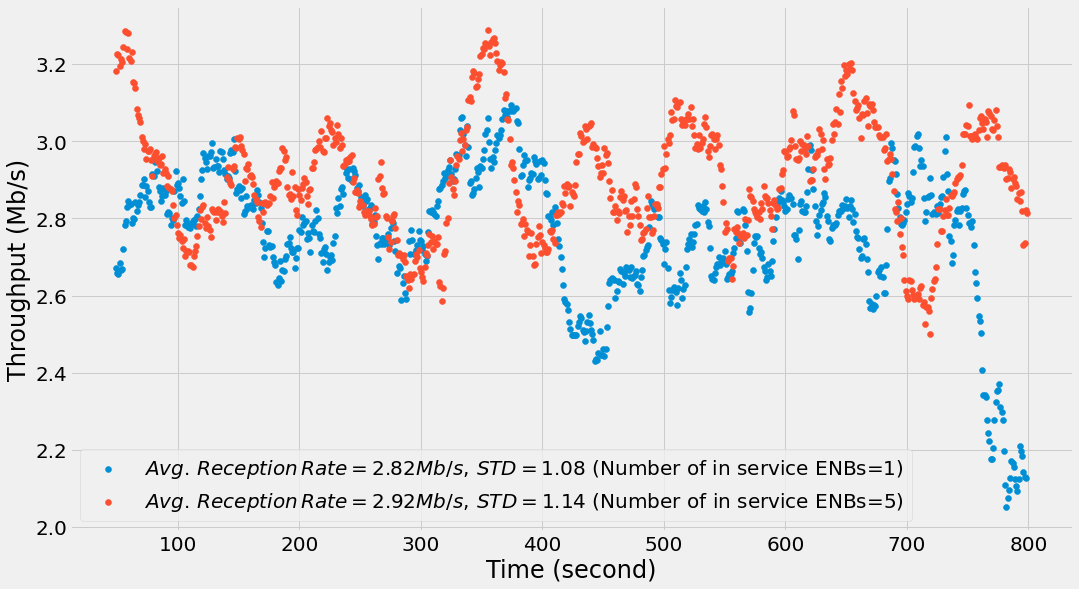

In [105]:
# Analyse effect of frequency
experiments_path = [
    # 'exp-f:700-bw:15-video:800p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt',
    # 'exp-f:700-bw:15-video:1280p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt',
    # 'exp-f:700-bw:15-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt',
    
    
    # 'exp-f:700-bw:15-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt',
    # 'exp-f:700-bw:50-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt',
    # 'exp-f:700-bw:100-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt',
    'exp-f:2600-bw:100-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt-nbUAVs:1-useCA:false-nbCC:1-scenario:RMa-nbENB:1-run:0',
    # 'exp-f:700-bw:100-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt-nbUAVs:1-useCA:false-nbCC:1-scenario:RMa-nbENB:3-run:0',
    'exp-f:2600-bw:100-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt-nbUAVs:1-useCA:false-nbCC:1-scenario:RMa-nbENB:5-run:0',
    
    
    # 'exp-f:700-bw:15-video:1280p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt',
    # 'exp-f:1500-bw:15-video:1280p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt',
    # 'exp-f:2600-bw:15-video:1280p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt',
    
    
    # 'exp-f:700-bw:15-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt',
    # 'exp-f:1500-bw:15-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt',
    # 'exp-f:2600-bw:15-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt',
    
    # 'exp-f:700-bw:50-video:1280p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt',
    # 'exp-f:1500-bw:50-video:1280p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt',
    # 'exp-f:2600-bw:50-video:1280p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt',
]

mu = []
fig, ax = plt.subplots(figsize=(16, 9))

for i, path in enumerate(experiments_path):
    try:
        video_0 = pd.read_csv('./%s/VideoPacketTrace.txt' % path, delimiter='\t').to_numpy()
    except:
        video_0 = pd.read_csv('./%s/uav-1-VideoPacketTrace.txt' % path, delimiter='\t').to_numpy()
    
    freq = path[path.find('f:') + 2: path.find('-bw')]
    bw = path[path.find('-bw:') + 4:path.find('-video')]
    video_quality = path[path.find('-video:') + 7:path.find('-fr:')]
    fr_alg = path[path.find('-fr:') + 4:]
    nbENB = path[path.find('-nbENB:') + 7:path.find('-run')]

    rx_t, rx_sum_rate, tx_t, tx_sum_rate = extract_video_throuput(video_0)  # 6 mhz
    smoothed_rx_t, smoothed_rx_sum_rate = smooth(rx_sum_rate)

    # plt.scatter(smoothed_rx_t, smoothed_rx_sum_rate, label='Reception (f=%s, bw=%s, vq=%s)' % (freq, bw, video_quality))
    plt.scatter(smoothed_rx_t, smoothed_rx_sum_rate, label='$Avg. \, Reception \, Rate=%.2f Mb/s, \, STD=%.2f$ (Number of in service ENBs=%s)' % (tx_sum_rate.mean(), tx_sum_rate.std(), nbENB))
    # mu.append('$Avg. Rate=%.2f Mb/s, \quad STD=%.2f$' % (rx_sum_rate.mean(), rx_sum_rate.std()))

    
# handles, labels = ax.get_legend_handles_labels()
# first_legend = ax.legend(handles, mu, loc='upper left')
# ax.add_artist(first_legend)

plt.legend()
plt.xlabel('Time (second)')
plt.ylabel('Throughput (Mb/s)')
if (save_enabled):
    plt.savefig('%s/Reception-Throughput-DiffFreq.%s' % (save_dir, save_format))
plt.show()

Reception-Throughput-CDF-DiffFreq-VQ:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt-nbUAVs:1-useCA:false-nbCC:1-scenario:RMa-nbENB:1-run:0-ProportionalBW:100,100,100


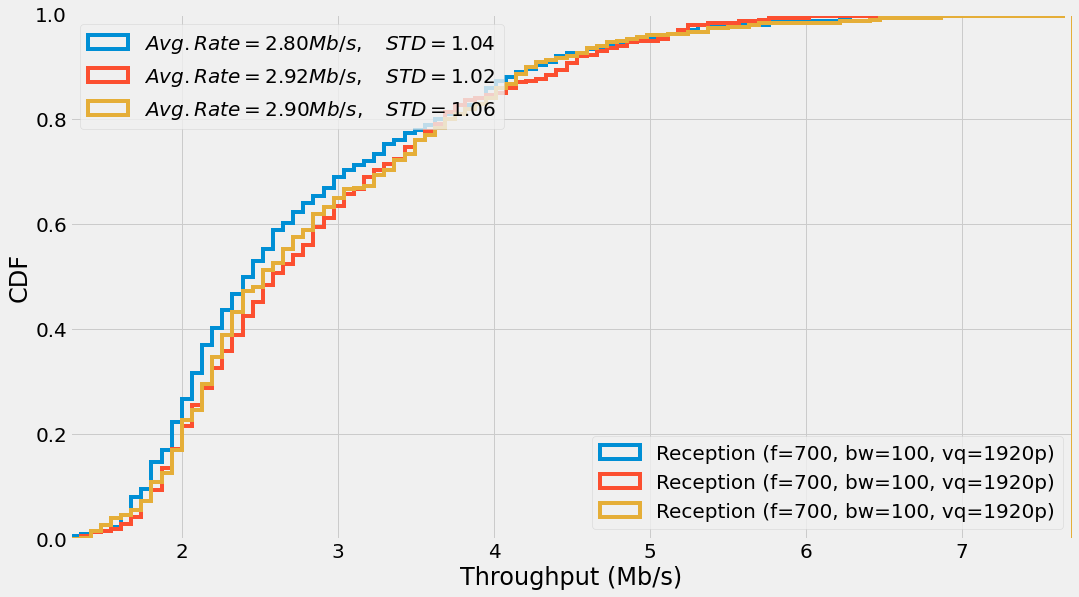

In [32]:
# Analyse effect of frequency and proportional bandwidth
experiments_path = [
    
    
    # 'exp-f:700-bw:15-video:800p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt',
    # 'exp-f:1500-bw:15-video:1280p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt',
    # 'exp-f:2600-bw:15-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt',
    
    'exp-f:700-bw:100-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt-nbUAVs:1-useCA:false-nbCC:1-scenario:RMa-nbENB:1-run:0',
    'exp-f:700-bw:100-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt-nbUAVs:1-useCA:false-nbCC:1-scenario:RMa-nbENB:3-run:0',
    'exp-f:700-bw:100-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt-nbUAVs:1-useCA:false-nbCC:1-scenario:RMa-nbENB:5-run:0',
    
    
    # 'exp-f:700-bw:6-video:800p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:700-bw:6-video:1280p-fr:LteFrNoOpAlgorithm',
    
    # 'exp-f:700-bw:6-video:1920p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:700-bw:6-video:1920p-fr:LteFfrSoftAlgorithm',
    # 'exp-f:700-bw:6-video:1920p-fr:LteFfrSoftAlgorithm-pc:t',
    
    
    # 'exp-f:700-bw:15-video:1280p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:700-bw:15-video:1920p-fr:LteFrNoOpAlgorithm',
    
#     'exp-f:700-bw:25-video:1920p-fr:LteFrNoOpAlgorithm',
#     'exp-f:700-bw:25-video:1920p-fr:LteFfrSoftAlgorithm',
    
    # 'exp-f:700-bw:50-video:1920p-fr:LteFrNoOpAlgorithm',
#     'exp-f:700-bw:50-video:1920p-fr:LteFfrSoftAlgorithm',
    
    # 'exp-f:700-bw:100-video:1920p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:700-bw:100-video:1920p-fr:LteFfrSoftAlgorithm',
    # 'exp-f:700-bw:100-video:1920p-fr:LteFfrSoftAlgorithm-pc:t',
    

    # 'exp-f:1500-bw:15-video:800p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:1500-bw:15-video:1280p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:1500-bw:15-video:1920p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:1500-bw:25-video:1920p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:1500-bw:50-video:1920p-fr:LteFrNoOpAlgorithm',
    
    # 'exp-f:2600-bw:15-video:1280p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:2600-bw:15-video:1920p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:2600-bw:25-video:1920p-fr:LteFrNoOpAlgorithm',
#     'exp-f:2600-bw:50-video:800p-fr:LteFrNoOpAlgorithm',
#     'exp-f:2600-bw:50-video:1280p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:2600-bw:50-video:1920p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:2600-bw:75-video:1920p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:2600-bw:100-video:1920p-fr:LteFfrSoftAlgorithm-pc:t',
    # 'exp-f:2600-bw:6-video:1920p-fr:LteFfrSoftAlgorithm-pc:t',
    # 'exp-f:2600-bw:6-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt'
]

save_path = 'Reception-Throughput-CDF-DiffFreq-VQ:%s-ProportionalBW:' % experiments_path[0][experiments_path[0].find('-video:') + 7:]

# print(save_path)

min_throughput = 1000
max_throughput = 0
for i, path in enumerate(experiments_path):
    try:
        video_0 = pd.read_csv('./%s/VideoPacketTrace.txt' % path, delimiter='\t').to_numpy()
    except:
        video_0 = pd.read_csv('./%s/uav-1-VideoPacketTrace.txt' % path, delimiter='\t').to_numpy()
    rx_t, rx_sum_rate, tx_t, tx_sum_rate = extract_video_throuput(video_0)  # 6 mhz
    min_throughput = min(rx_sum_rate.min(), min_throughput)
    max_throughput = max(rx_sum_rate.max(), max_throughput)


HIST_BINS = np.linspace(min_throughput, max_throughput, 100)
mu = []
fig, ax = plt.subplots(figsize=(16, 9))
for i, path in enumerate(experiments_path):
    try:
        video_0 = pd.read_csv('./%s/VideoPacketTrace.txt' % path, delimiter='\t').to_numpy()
    except:
        video_0 = pd.read_csv('./%s/uav-1-VideoPacketTrace.txt' % path, delimiter='\t').to_numpy()
    
    freq = path[path.find('f:') + 2: path.find('-bw')]
    bw = path[path.find('-bw:') + 4:path.find('-video')]
    video_quality = path[path.find('-video:') + 7:path.find('-fr:')]
    fr_alg = path[path.find('-fr:') + 4:]
    
    save_path += bw + ","
    
    rx_t, rx_sum_rate, tx_t, tx_sum_rate = extract_video_throuput(video_0)  # 6 mhz

    smoothed_rx_t, smoothed_rx_sum_rate = smooth(rx_sum_rate)

    plt.hist(rx_sum_rate, bins=HIST_BINS, range=(min_throughput, max_throughput), cumulative=True, density=True, histtype='step', linewidth=4,
             label='Reception (f=%s, bw=%s, vq=%s)' % (freq, bw, video_quality))
    
    # plt.hist(rx_sum_rate, bins=HIST_BINS, range=(min_throughput, max_throughput), cumulative=True, density=True,
    #          label='Reception (f=%s, bw=%s, vq=%s)' % (freq, bw, video_quality))
    mu.append('$Avg. Rate=%.2f Mb/s, \quad STD=%.2f$' % (rx_sum_rate.mean(), rx_sum_rate.std()))

    
handles, labels = ax.get_legend_handles_labels()
first_legend = ax.legend(handles, mu, loc='upper left')
ax.add_artist(first_legend)

plt.xlim(min_throughput, max_throughput)
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.xlabel('Throughput (Mb/s)')
plt.ylabel('CDF')

print(save_path[:-1])

if (save_enabled):
    plt.savefig('%s/%s.%s' % (save_dir, save_path[:-1], save_format))

plt.show()

Reception-Throughput-CDF-DiffFreq-VQ:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt-nbUAVs:1-useCA:false-nbCC:1-scenario:RMa-nbENB:1-run:0-FixedBW:100


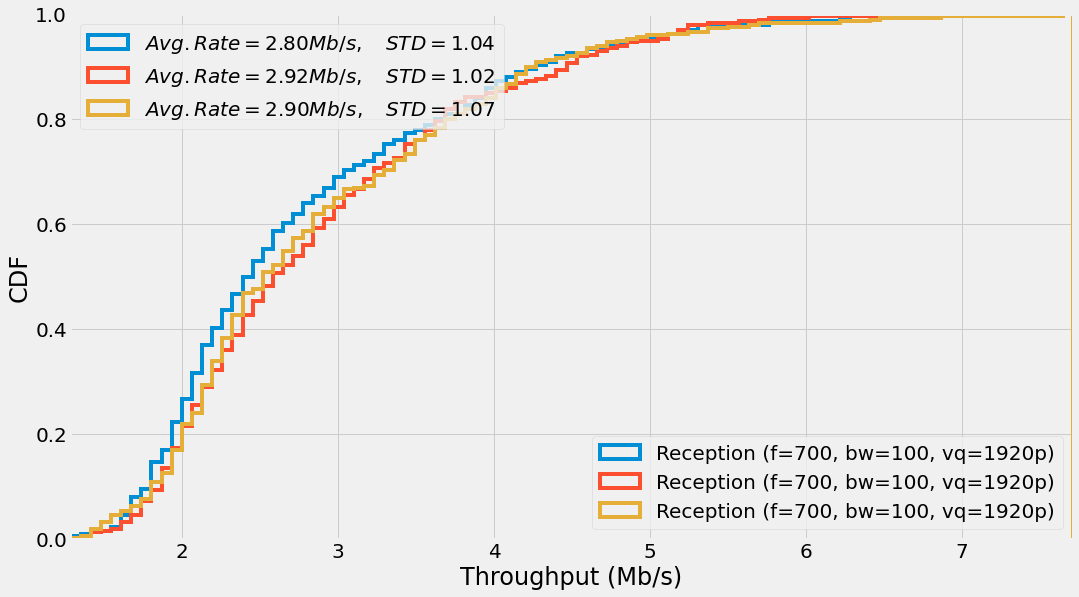

In [24]:
# Analyse effect of frequency with fixed bandwidth
experiments_path = [
    # 'exp-f:700-bw:6-video:800p',
    # 'exp-f:700-bw:6-video:1280p',
    # 'exp-f:700-bw:15-video:1280p',
    # 'exp-f:700-bw:6-video:1920p',
    # 'exp-f:700-bw:15-video:1920p',
    # 'exp-f:700-bw:25-video:1920p',

    # 'exp-f:1500-bw:15-video:800p',
    # 'exp-f:1500-bw:15-video:1280p',
    # 'exp-f:1500-bw:15-video:1920p',
    # 'exp-f:1500-bw:25-video:1920p',
    # 'exp-f:1500-bw:50-video:1920p',
    
    # 'exp-f:2600-bw:50-video:800p',
    # 'exp-f:2600-bw:50-video:1280p',
    # 'exp-f:2600-bw:15-video:1280p',
    # 'exp-f:2600-bw:15-video:1920p',
    # 'exp-f:2600-bw:25-video:1920p',
    # 'exp-f:2600-bw:50-video:1920p',
    # 'exp-f:2600-bw:75-video:1920p',
    'exp-f:700-bw:100-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt-nbUAVs:1-useCA:false-nbCC:1-scenario:RMa-nbENB:1-run:0',
    'exp-f:700-bw:100-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt-nbUAVs:1-useCA:false-nbCC:1-scenario:RMa-nbENB:3-run:0',
    'exp-f:700-bw:100-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt-nbUAVs:1-useCA:false-nbCC:1-scenario:RMa-nbENB:5-run:0',
]

save_path = 'Reception-Throughput-CDF-DiffFreq-VQ:%s-FixedBW:%s' % (experiments_path[0][experiments_path[0].find('-video:') + 7:], experiments_path[0][experiments_path[0].find('-bw:') + 4:experiments_path[0].find('-video')])

# print(save_path)

min_throughput = 1000
max_throughput = 0
for i, path in enumerate(experiments_path):
    try:
        video_0 = pd.read_csv('./%s/VideoPacketTrace.txt' % path, delimiter='\t').to_numpy()
    except:
        video_0 = pd.read_csv('./%s/uav-1-VideoPacketTrace.txt' % path, delimiter='\t').to_numpy()
    rx_t, rx_sum_rate, tx_t, tx_sum_rate = extract_video_throuput(video_0)  # 6 mhz
    min_throughput = min(rx_sum_rate.min(), min_throughput)
    max_throughput = max(rx_sum_rate.max(), max_throughput)


HIST_BINS = np.linspace(min_throughput, max_throughput, 100)
mu = []
fig, ax = plt.subplots(figsize=(16, 9))
for i, path in enumerate(experiments_path):
    try:
        video_0 = pd.read_csv('./%s/VideoPacketTrace.txt' % path, delimiter='\t').to_numpy()
    except:
        video_0 = pd.read_csv('./%s/uav-1-VideoPacketTrace.txt' % path, delimiter='\t').to_numpy()
    
    freq = path[path.find('f:') + 2: path.find('-bw')]
    bw = path[path.find('-bw:') + 4:path.find('-video')]
    video_quality = path[path.find('-video:') + 7:path.find('-fr:')]
    fr_alg = path[path.find('-fr:') + 4:]
    
    # save_path += bw + ","
    
    rx_t, rx_sum_rate, tx_t, tx_sum_rate = extract_video_throuput(video_0)  # 6 mhz

    smoothed_rx_t, smoothed_rx_sum_rate = smooth(rx_sum_rate)

    plt.hist(rx_sum_rate, bins=HIST_BINS, range=(min_throughput, max_throughput), cumulative=True, density=True, histtype='step', linewidth=4,
             label='Reception (f=%s, bw=%s, vq=%s)' % (freq, bw, video_quality))
    # plt.scatter(smoothed_tx_t, smoothed_tx_sum_rate, label='Transmission (f=%s, bw=%s)' % (experiments_freq[i], experiments_bw[i]))
    mu.append('$Avg. Rate=%.2f Mb/s, \quad STD=%.2f$' % (rx_sum_rate.mean(), rx_sum_rate.std()))

    
handles, labels = ax.get_legend_handles_labels()
first_legend = ax.legend(handles, mu, loc='upper left')
ax.add_artist(first_legend)

plt.xlim(min_throughput, max_throughput)
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.xlabel('Throughput (Mb/s)')
plt.ylabel('CDF')

print(save_path)

if (save_enabled):
    plt.savefig('%s/%s.%s' % (save_dir, save_path, save_format))

plt.show()

Reception-Throughput-DiffBW-F:700-VQ:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt-nbUAVs:1-useCA:false-nbCC:1-scenario:RMa-nbENB:1-run:0
Reception-Throughput-DiffBW-F:700-VQ:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt-nbUAVs:1-useCA:false-nbCC:1-scenario:RMa-nbENB:1-run:0


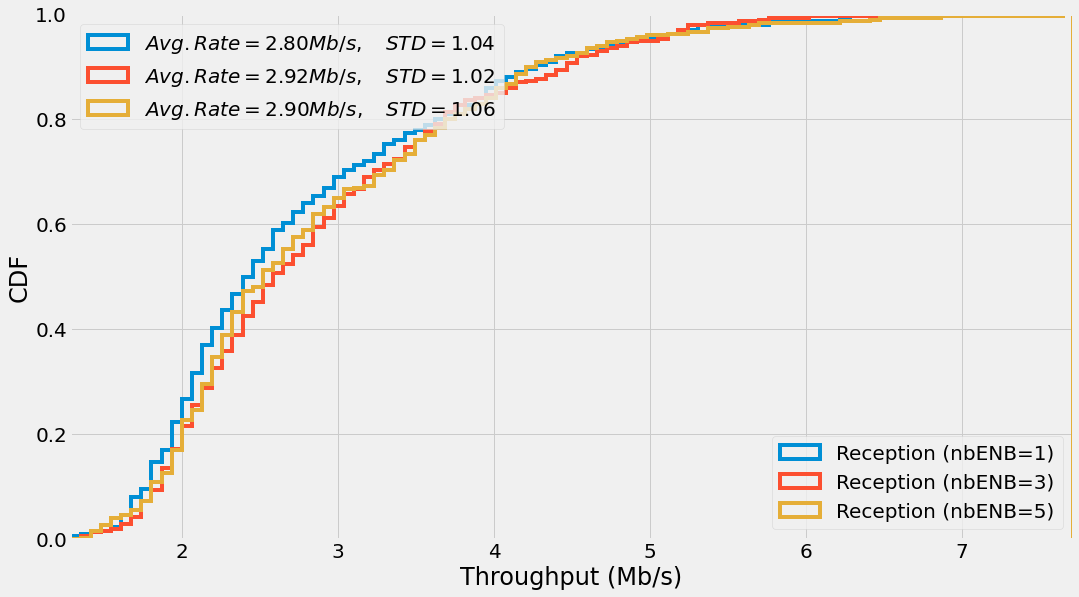

In [51]:
# Analyse effect of bandwidth while the frequency is fixed
experiments_path = [
    # 'exp-f:700-bw:6-video:800p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:700-bw:6-video:1280p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:700-bw:6-video:1920p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:700-bw:6-video:1920p-fr:LteFfrSoftAlgorithm',
    
    # 'exp-f:700-bw:15-video:1280p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:700-bw:15-video:1920p-fr:LteFrNoOpAlgorithm',
    
#     'exp-f:700-bw:25-video:1920p-fr:LteFrNoOpAlgorithm',
#     'exp-f:700-bw:25-video:1920p-fr:LteFfrSoftAlgorithm',
    
#     'exp-f:700-bw:50-video:1920p-fr:LteFrNoOpAlgorithm',
#     'exp-f:700-bw:50-video:1920p-fr:LteFfrSoftAlgorithm',
    
#     'exp-f:700-bw:100-video:1920p-fr:LteFfrSoftAlgorithm',
#     'exp-f:700-bw:100-video:1920p-fr:LteFrNoOpAlgorithm',
    

    # 'exp-f:1500-bw:15-video:800p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:1500-bw:15-video:1280p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:1500-bw:15-video:1920p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:1500-bw:25-video:1920p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:1500-bw:50-video:1920p-fr:LteFrNoOpAlgorithm',
    
    # 'exp-f:2600-bw:15-video:1280p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:2600-bw:15-video:1920p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:2600-bw:25-video:1920p-fr:LteFrNoOpAlgorithm',
#     'exp-f:2600-bw:50-video:800p-fr:LteFrNoOpAlgorithm',
#     'exp-f:2600-bw:50-video:1280p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:2600-bw:50-video:1920p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:2600-bw:75-video:1920p-fr:LteFrNoOpAlgorithm',
    'exp-f:700-bw:100-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt-nbUAVs:1-useCA:false-nbCC:1-scenario:RMa-nbENB:1-run:0',
    'exp-f:700-bw:100-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt-nbUAVs:1-useCA:false-nbCC:1-scenario:RMa-nbENB:3-run:0',
    'exp-f:700-bw:100-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt-nbUAVs:1-useCA:false-nbCC:1-scenario:RMa-nbENB:5-run:0',
]

save_path = 'Reception-Throughput-DiffBW-F:%s-VQ:%s' % (experiments_path[0][experiments_path[0].find('f:') + 2: path.find('-bw')], experiments_path[0][experiments_path[0].find('-video:') + 7:])

print(save_path)

min_throughput = 1000
max_throughput = 0
for i, path in enumerate(experiments_path):
    try:
        video_0 = pd.read_csv('./%s/VideoPacketTrace.txt' % path, delimiter='\t').to_numpy()
    except:
        video_0 = pd.read_csv('./%s/uav-1-VideoPacketTrace.txt' % path, delimiter='\t').to_numpy()
    rx_t, rx_sum_rate, tx_t, tx_sum_rate = extract_video_throuput(video_0)  # 6 mhz
    min_throughput = min(rx_sum_rate.min(), min_throughput)
    max_throughput = max(rx_sum_rate.max(), max_throughput)




HIST_BINS = np.linspace(min_throughput, max_throughput, 100)
mu = []
fig, ax = plt.subplots(figsize=(16, 9))
for i, path in enumerate(experiments_path):
    try:
        video_0 = pd.read_csv('./%s/VideoPacketTrace.txt' % path, delimiter='\t').to_numpy()
    except:
        video_0 = pd.read_csv('./%s/uav-1-VideoPacketTrace.txt' % path, delimiter='\t').to_numpy()
    
    freq = path[path.find('f:') + 2: path.find('-bw')]
    bw = path[path.find('-bw:') + 4:path.find('-video')]
    video_quality = path[path.find('-video:') + 7:path.find('-fr:')]
    fr_alg = path[path.find('-fr:') + 4:]
    nbENB = path[path.find('-nbENB:') + 7:path.find('-run')]
    
    rx_t, rx_sum_rate, tx_t, tx_sum_rate = extract_video_throuput(video_0)  # 6 mhz

    smoothed_rx_t, smoothed_rx_sum_rate = smooth(rx_sum_rate)

    # ax.hist(rx_sum_rate, bins=HIST_BINS, range=(min_throughput, max_throughput), cumulative=True, density=True, histtype='step', linewidth=4,
             # label='Reception (f=%s, bw=%s, vq=%s)' % (freq, bw, video_quality))
    ax.hist(rx_sum_rate, bins=HIST_BINS, range=(min_throughput, max_throughput), cumulative=True, density=True, histtype='step', linewidth=4,
             label='Reception (nbENB=%s)' % (nbENB))
    
    mu.append('$Avg. Rate=%.2f Mb/s, \quad STD=%.2f$' % (rx_sum_rate.mean(), rx_sum_rate.std()))

    
handles, labels = ax.get_legend_handles_labels()
first_legend = ax.legend(handles, mu, loc='upper left')
ax.add_artist(first_legend)

plt.xlim(min_throughput, max_throughput)
plt.ylim(0, 1)
ax.legend(loc='lower right')
plt.xlabel('Throughput (Mb/s)')
plt.ylabel('CDF')

print(save_path[:])

if (save_enabled):
    plt.savefig('%s/%s.%s' % (save_dir, save_path[:], save_format))

plt.show()


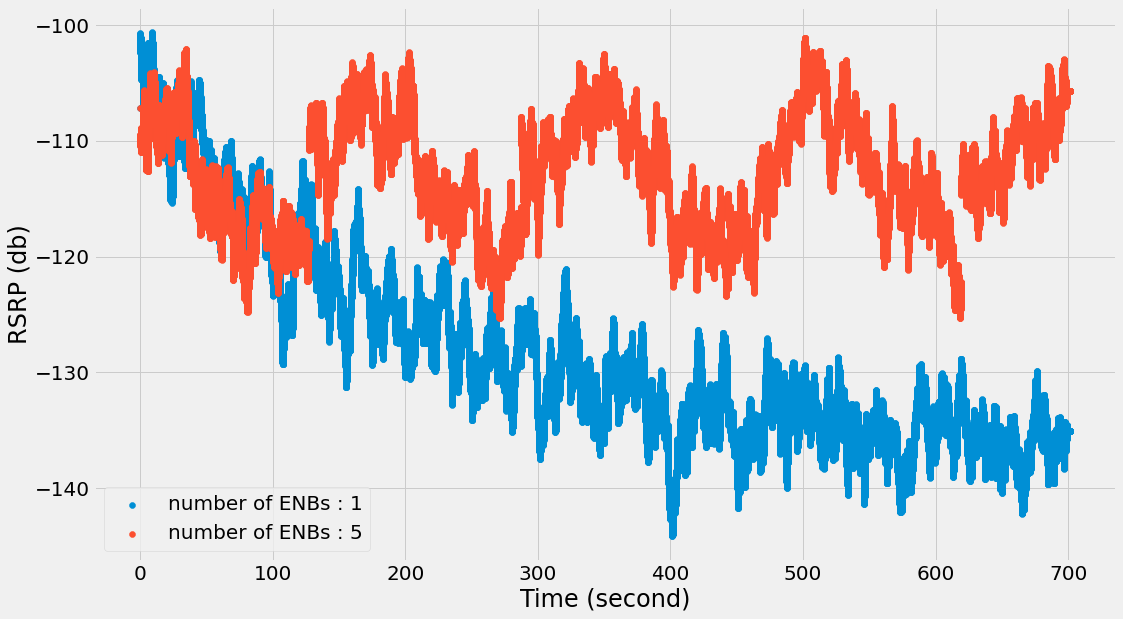

In [100]:
plt.figure(figsize=(16, 9))
for i, path in enumerate(experiments_path):
    dl_0 = pd.read_csv('./%s/DlRsrpSinrStats.txt' % path, delimiter='	').to_numpy()
    
    freq = path[path.find('f:') + 2: path.find('-bw')]
    bw = path[path.find('-bw:') + 4:path.find('-video')]
    nbENB = path[path.find('-nbENB:') + 7:path.find('-run')]
    video_quality = path[path.find('-video:') + 7:]

    dl_t, dl_rsrp, dl_sinr = extract_dl_info(dl_0)
    
    # plt.scatter(dl_t, dl_rsrp, label='DL (f=%s, bw=%s, vq=%s)' % (freq, bw, video_quality))
    plt.scatter(dl_t, dl_rsrp, label='number of ENBs : %s' % (nbENB))

plt.legend()
plt.xlabel('Time (second)')
plt.ylabel('RSRP (db)')
plt.tight_layout()
if (save_enabled):
    save_path = 'RSRP-DL-diffENB'
    plt.savefig('%s/%s.%s' % (save_dir, save_path[:], save_format))

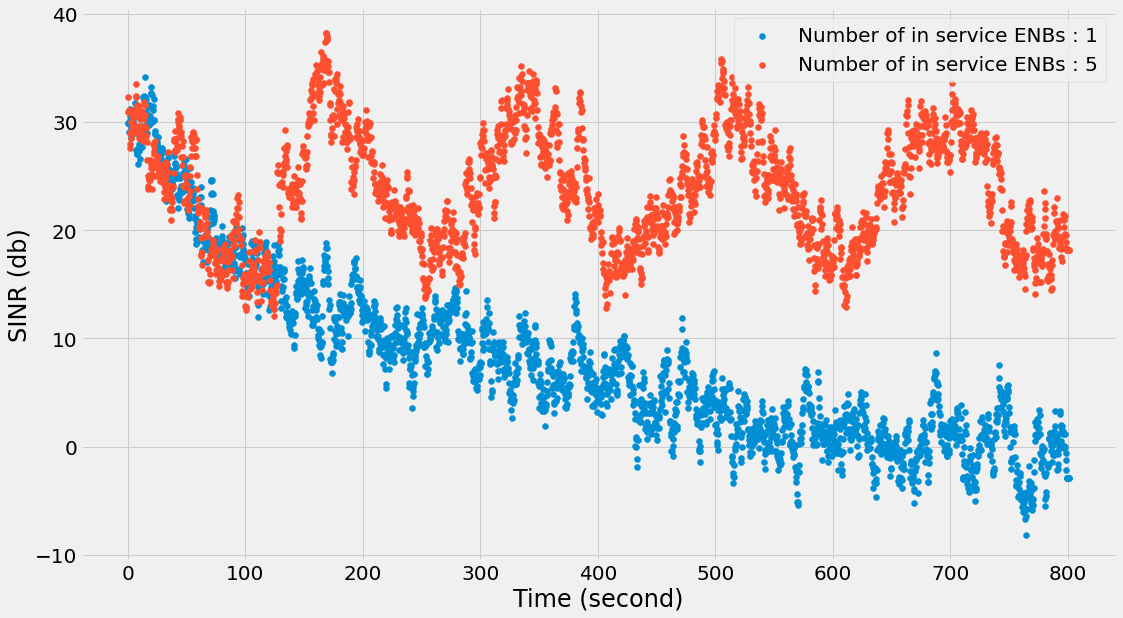

In [102]:
experiments_path = [
    # 'exp-f:700-bw:6-video:800p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:700-bw:6-video:1280p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:700-bw:6-video:1920p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:700-bw:6-video:1920p-fr:LteFfrSoftAlgorithm',
    # 'exp-f:700-bw:6-video:1920p-fr:LteFfrSoftAlgorithm-pc:t',
    
    
    # 'exp-f:700-bw:15-video:1280p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:700-bw:15-video:1920p-fr:LteFrNoOpAlgorithm',
    
#     'exp-f:700-bw:25-video:1920p-fr:LteFrNoOpAlgorithm',
#     'exp-f:700-bw:25-video:1920p-fr:LteFfrSoftAlgorithm',
    
    # 'exp-f:700-bw:50-video:1920p-fr:LteFrNoOpAlgorithm',
#     'exp-f:700-bw:50-video:1920p-fr:LteFfrSoftAlgorithm',
    
    # 'exp-f:700-bw:100-video:1920p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:700-bw:100-video:1920p-fr:LteFfrSoftAlgorithm',
    # 'exp-f:700-bw:100-video:1920p-fr:LteFfrSoftAlgorithm-pc:t',
    'exp-f:2600-bw:100-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt-nbUAVs:1-useCA:false-nbCC:1-scenario:RMa-nbENB:1-run:0',
    # 'exp-f:700-bw:100-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt-nbUAVs:1-useCA:false-nbCC:1-scenario:RMa-nbENB:3-run:0',
    'exp-f:2600-bw:100-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt-nbUAVs:1-useCA:false-nbCC:1-scenario:RMa-nbENB:5-run:0',
    

    # 'exp-f:1500-bw:15-video:800p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:1500-bw:15-video:1280p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:1500-bw:15-video:1920p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:1500-bw:25-video:1920p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:1500-bw:50-video:1920p-fr:LteFrNoOpAlgorithm',
    
    # 'exp-f:2600-bw:15-video:1280p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:2600-bw:15-video:1920p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:2600-bw:25-video:1920p-fr:LteFrNoOpAlgorithm',
#     'exp-f:2600-bw:50-video:800p-fr:LteFrNoOpAlgorithm',
#     'exp-f:2600-bw:50-video:1280p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:2600-bw:50-video:1920p-fr:LteFrNoOpAlgorithm',
    # 'exp-f:2600-bw:75-video:1920p-fr:LteFrNoOpAlgorithm',
]

plt.figure(figsize=(16, 9))
for i, path in enumerate(experiments_path):
    ul_0 = pd.read_csv('./%s/UlSinrStats.txt' % path, delimiter='	').to_numpy()
    freq = path[path.find('f:') + 2: path.find('-bw')]
    bw = path[path.find('-bw:') + 4:path.find('-video')]
    video_quality = path[path.find('-video:') + 7:]
    nbENB = path[path.find('-nbENB:') + 7:path.find('-run')]

    ul_t, ul_sinr = extract_ul_sinr(ul_0)
    
    # plt.scatter(ul_t, ul_sinr, label='UL (f=%s, bw=%s, vq=%s)' % (freq, bw, video_quality))
    plt.scatter(ul_t, ul_sinr, label='Number of in service ENBs : %s' % (nbENB))
    
    
plt.legend()
plt.xlabel('Time (second)')
plt.ylabel('SINR (db)')
plt.tight_layout()
if (save_enabled):
    save_path = 'SINR-UL-diffENB'
    plt.savefig('%s/%s.%s' % (save_dir, save_path[:], save_format))

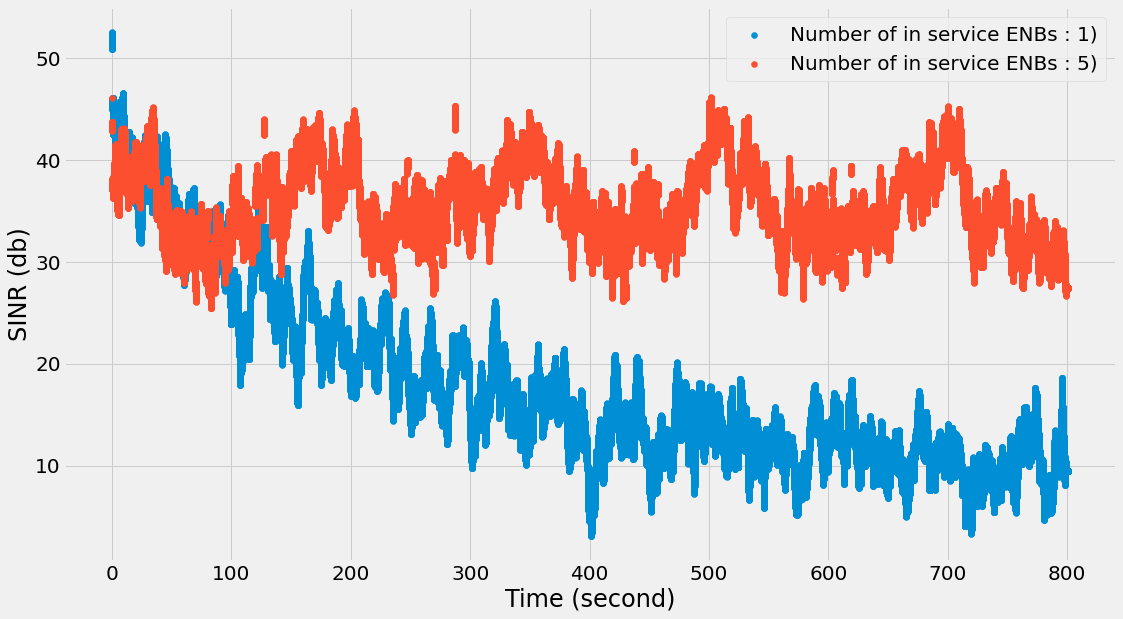

In [103]:
plt.figure(figsize=(16, 9))
for i, path in enumerate(experiments_path):
    dl_0 = pd.read_csv('./%s/DlRsrpSinrStats.txt' % path, delimiter='	').to_numpy()
    
    freq = path[path.find('f:') + 2: path.find('-bw')]
    bw = path[path.find('-bw:') + 4:path.find('-video')]
    video_quality = path[path.find('-video:') + 7:]
    nbENB = path[path.find('-nbENB:') + 7:path.find('-run')]
    
    dl_t, dl_rsrp, dl_sinr = extract_dl_info(dl_0)
    
    # plt.scatter(dl_t, dl_sinr, label='DL (f=%s, bw=%s, vq=%s)' % (freq, bw, video_quality))
    plt.scatter(dl_t, dl_sinr, label='Number of in service ENBs : %s)' % (nbENB))
    
    

plt.legend()
plt.xlabel('Time (second)')
plt.ylabel('SINR (db)')
plt.tight_layout()
if (save_enabled):
    save_path = 'SINR-DL-diffENB'
    plt.savefig('%s/%s.%s' % (save_dir, save_path[:], save_format))

In [46]:
# Analyse effect of frequency
experiments_path = [
                    # 'exp-f:700-bw:6-video:800p',
                    # 'exp-f:700-bw:6-video:1280p',
                    # 'exp-f:700-bw:6-video:1920p',
                    # 'exp-f:1500-bw:15-video:800p',
                    # 'exp-f:1500-bw:15-video:1280p',
                    # 'exp-f:1500-bw:15-video:1920p',
                    # 'exp-f:2600-bw:50-video:800p',
    'exp-f:700-bw:100-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt-nbUAVs:1-useCA:false-nbCC:1-scenario:RMa-nbENB:1-run:0',
    'exp-f:700-bw:100-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt-nbUAVs:1-useCA:false-nbCC:1-scenario:RMa-nbENB:3-run:0',
    'exp-f:700-bw:100-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt-nbUAVs:1-useCA:false-nbCC:1-scenario:RMa-nbENB:5-run:0',
                   ]

min_delay = 1e10
max_delay = 0
for i, path in enumerate(experiments_path):
    telemetry_data = pd.read_csv('./%s/uav-1-telemetry-info.txt' % path, delimiter=',').to_numpy()
    t, delay = extract_delay_data(telemetry_data)
    # delay = delay / 1000
    
    min_delay = min(delay.min(), min_delay)
    max_delay = max(delay.max(), max_delay)

max_delay = 200
    
HIST_BINS = np.linspace(min_delay, max_delay, int(1e6))
plt.figure(figsize=(16, 9))
for i, path in enumerate(experiments_path):
    telemetry_data = pd.read_csv('./%s/uav-1-telemetry-info.txt' % path, delimiter=',').to_numpy()
    
    freq = path[path.find('f:') + 2: path.find('-bw')]
    bw = path[path.find('-bw:') + 4:path.find('-video')]
    video_quality = path[path.find('-video:') + 7:]

    t, delay = extract_delay_data(telemetry_data)
    # delay = delay / 1000

    plt.hist(delay, bins=HIST_BINS, range=(min_delay, max_delay), cumulative=True, density=True, histtype='step', linewidth=4,
             label='Delay (f=%s, bw=%s, vq=%s)' % (freq, bw, video_quality))

plt.xlim(min_delay, max_delay)
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Delay (ms)')
plt.ylabel('CDF')

if (save_enabled):
    plt.savefig('%s/Delay-CDF.pdf' % save_dir)

plt.show()


FileNotFoundError: [Errno 2] No such file or directory: './exp-f:700-bw:100-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt-nbUAVs:1-useCA:false-nbCC:1-scenario:RMa-nbENB:1-run:0/uav-1-telemetry-info.txt'

LossRate-DiffBW-F:700-VQ:1920p
LossRate-DiffBW-F:700-VQ:1920p


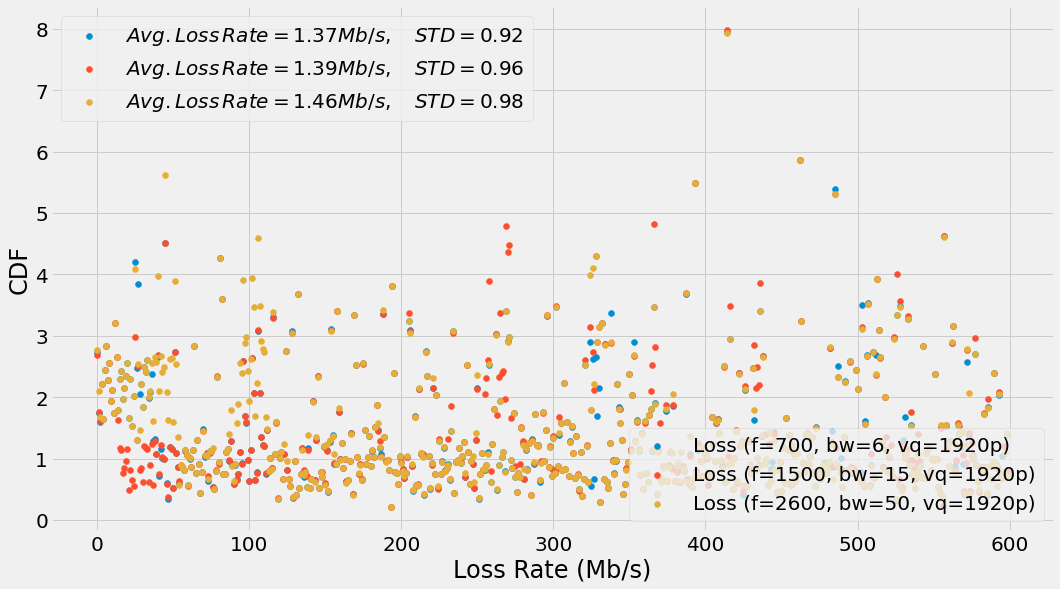

In [165]:
# Analyse effect of bandwidth while the frequency is fixed
experiments_path = [
    # 'exp-f:700-bw:6-video:800p',
    # 'exp-f:700-bw:6-video:1280p',
    
    'exp-f:700-bw:6-video:1920p',
    # 'exp-f:700-bw:15-video:1920p',
    # 'exp-f:700-bw:25-video:1920p',

    # 'exp-f:1500-bw:15-video:800p',
    # 'exp-f:1500-bw:15-video:1280p',
    
    'exp-f:1500-bw:15-video:1920p',
    # 'exp-f:1500-bw:25-video:1920p',
    # 'exp-f:1500-bw:50-video:1920p',
    
    # 'exp-f:2600-bw:50-video:800p',
    # 'exp-f:2600-bw:50-video:1280p',
    
    # 'exp-f:2600-bw:25-video:1920p',
    'exp-f:2600-bw:50-video:1920p',
    # 'exp-f:2600-bw:75-video:1920p',
]

save_path = 'LossRate-DiffBW-F:%s-VQ:%s' % (experiments_path[0][experiments_path[0].find('f:') + 2: experiments_path[0].find('-bw')], experiments_path[0][experiments_path[0].find('-video:') + 7:])

print(save_path)

min_throughput = 1000
max_throughput = 0
for i, path in enumerate(experiments_path):
    try:
        video_0 = pd.read_csv('./%s/VideoPacketTrace.txt' % path, delimiter='\t').to_numpy()
    except:
        video_0 = pd.read_csv('./%s/uav-1-VideoPacketTrace.txt' % path, delimiter='\t').to_numpy()
    rx_t, rx_sum_rate, tx_t, tx_sum_rate = extract_video_throuput(video_0)  # 6 mhz
    min_throughput = min(np.min(tx_sum_rate - rx_sum_rate), min_throughput)
    max_throughput = max(np.max(tx_sum_rate - rx_sum_rate), max_throughput)


min_throughput= 0
HIST_BINS = np.linspace(0, max_throughput, 80)
mu = []
fig, ax = plt.subplots(figsize=(16, 9))
for i, path in enumerate(experiments_path):
    try:
        video_0 = pd.read_csv('./%s/VideoPacketTrace.txt' % path, delimiter='\t').to_numpy()
    except:
        video_0 = pd.read_csv('./%s/uav-1-VideoPacketTrace.txt' % path, delimiter='\t').to_numpy()
    
    freq = path[path.find('f:') + 2: path.find('-bw')]
    bw = path[path.find('-bw:') + 4:path.find('-video')]
    video_quality = path[path.find('-video:') + 7:]
    
    rx_t, rx_sum_rate, tx_t, tx_sum_rate = extract_video_throuput(video_0)  # 6 mhz

    plt.scatter(rx_t, tx_sum_rate - rx_sum_rate, label='Loss (f=%s, bw=%s, vq=%s)' % (freq, bw, video_quality))
    
    # plt.hist(tx_sum_rate - rx_sum_rate, bins=HIST_BINS, range=(min_throughput, max_throughput), cumulative=True, density=True, histtype='step', linewidth=4,
    #          label='Reception (f=%s, bw=%s, vq=%s)' % (freq, bw, video_quality))
    
    # plt.hist(tx_sum_rate - rx_sum_rate, bins=HIST_BINS, range=(min_throughput, max_throughput), cumulative=True, density=True,histtype='step', linewidth=4,
    #          label='Reception (f=%s, bw=%s, vq=%s)' % (freq, bw, video_quality))
    mu.append('$Avg. Loss\, Rate=%.2f Mb/s, \quad STD=%.2f$' % (np.mean(tx_sum_rate - rx_sum_rate), np.std(tx_sum_rate - rx_sum_rate)))

    
handles, labels = ax.get_legend_handles_labels()
first_legend = ax.legend(handles, mu, loc='upper left')
ax.add_artist(first_legend)

# plt.xlim(min_throughput, max_throughput)
plt.legend(loc='lower right')
plt.xlabel('Loss Rate (Mb/s)')
plt.ylabel('CDF')

print(save_path)

if (save_enabled):
    plt.savefig('%s/%s.%s' % (save_dir, save_path, save_format))

plt.show()

Reception-Throughput-DiffBW-F:700-VQ:1920p
Reception-Throughput-DiffBW-F:700-VQ:1920p


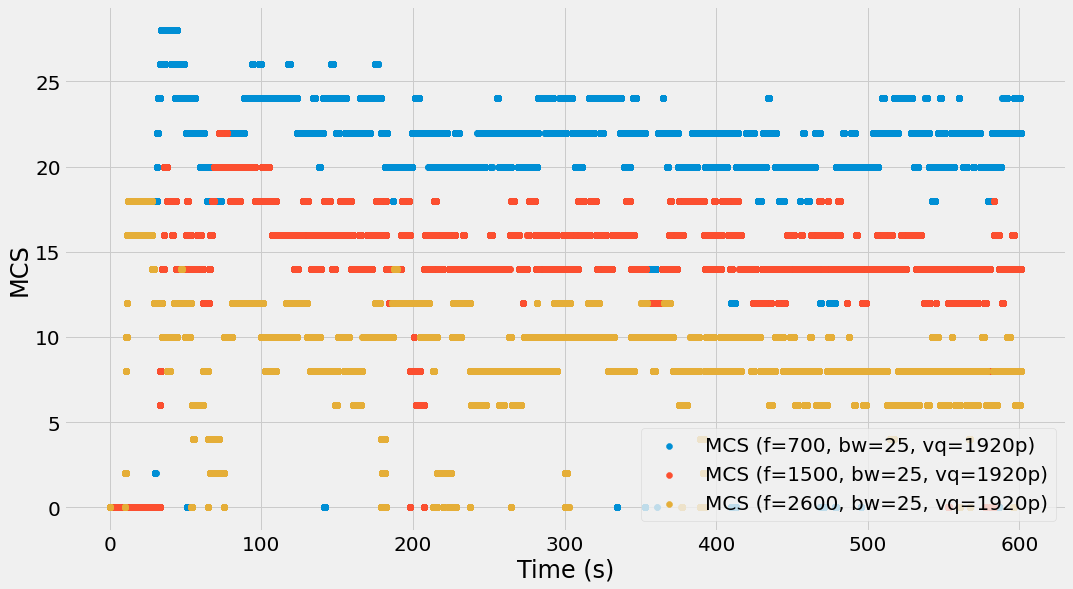

In [176]:
experiments_path = [
    # 'exp-f:700-bw:6-video:800p',
    # 'exp-f:700-bw:6-video:1280p',

    # 'exp-f:700-bw:6-video:1920p',
    # 'exp-f:700-bw:15-video:1920p',
    'exp-f:700-bw:25-video:1920p',

    # 'exp-f:1500-bw:15-video:800p',
    # 'exp-f:1500-bw:15-video:1280p',

    # 'exp-f:1500-bw:15-video:1920p',
    'exp-f:1500-bw:25-video:1920p',
    # 'exp-f:1500-bw:50-video:1920p',

    # 'exp-f:2600-bw:50-video:800p',
    # 'exp-f:2600-bw:50-video:1280p',

    'exp-f:2600-bw:25-video:1920p',
    # 'exp-f:2600-bw:50-video:1920p',
    # 'exp-f:2600-bw:75-video:1920p',
]

save_path = 'Reception-Throughput-DiffBW-F:%s-VQ:%s' % (
experiments_path[0][experiments_path[0].find('f:') + 2: experiments_path[0].find('-bw')],
experiments_path[0][experiments_path[0].find('-video:') + 7:])

print(save_path)


# HIST_BINS = np.linspace(min_throughput, max_throughput, 100)
# plt.figure(figsize=(16, 9))
fig, ax = plt.subplots(figsize=(16, 9))
for i, path in enumerate(experiments_path):
    video_0 = pd.read_csv('./%s/UlTxPhyStats.txt' % path, delimiter='\t').to_numpy()

    freq = path[path.find('f:') + 2: path.find('-bw')]
    bw = path[path.find('-bw:') + 4:path.find('-video')]
    video_quality = path[path.find('-video:') + 7:]

    mcs = video_0[:, 5]
    t = video_0[:, 0] / 1000

    ax.scatter(t, mcs, label='MCS (f=%s, bw=%s, vq=%s)' % (freq, bw, video_quality))



# plt.xlim(min_throughput, max_throughput)
ax.legend(loc='lower right')
plt.xlabel('Time (s)')
plt.ylabel('MCS')

print(save_path[:])

# if (save_enabled):
#     plt.savefig('%s/%s.%s' % (save_dir, save_path[:], save_format))

plt.show()

In [43]:
# Analyse effect of frequency and proportional bandwidth
experiments_path = [
    'exp-f:700-bw:6-video:800p-fr:LteFrNoOpAlgorithm',
    'exp-f:700-bw:6-video:1280p-fr:LteFrNoOpAlgorithm',
    'exp-f:700-bw:6-video:1920p-fr:LteFrNoOpAlgorithm',
    'exp-f:700-bw:6-video:1920p-fr:LteFfrSoftAlgorithm',
    
    'exp-f:700-bw:15-video:1280p-fr:LteFrNoOpAlgorithm',
    'exp-f:700-bw:15-video:1920p-fr:LteFrNoOpAlgorithm',
    
    'exp-f:700-bw:25-video:1920p-fr:LteFrNoOpAlgorithm',
    'exp-f:700-bw:25-video:1920p-fr:LteFfrSoftAlgorithm',
    
    'exp-f:700-bw:50-video:1920p-fr:LteFrNoOpAlgorithm',
    'exp-f:700-bw:50-video:1920p-fr:LteFfrSoftAlgorithm',
    
    'exp-f:700-bw:100-video:1920p-fr:LteFfrSoftAlgorithm',
    'exp-f:700-bw:100-video:1920p-fr:LteFrNoOpAlgorithm',
    

    'exp-f:1500-bw:15-video:800p-fr:LteFrNoOpAlgorithm',
    'exp-f:1500-bw:15-video:1280p-fr:LteFrNoOpAlgorithm',
    'exp-f:1500-bw:15-video:1920p-fr:LteFrNoOpAlgorithm',
    'exp-f:1500-bw:25-video:1920p-fr:LteFrNoOpAlgorithm',
    'exp-f:1500-bw:50-video:1920p-fr:LteFrNoOpAlgorithm',
    
    'exp-f:2600-bw:15-video:1280p-fr:LteFrNoOpAlgorithm',
    'exp-f:2600-bw:15-video:1920p-fr:LteFrNoOpAlgorithm',
    'exp-f:2600-bw:25-video:1920p-fr:LteFrNoOpAlgorithm',
    'exp-f:2600-bw:50-video:800p-fr:LteFrNoOpAlgorithm',
    'exp-f:2600-bw:50-video:1280p-fr:LteFrNoOpAlgorithm',
    'exp-f:2600-bw:50-video:1920p-fr:LteFrNoOpAlgorithm',
    'exp-f:2600-bw:75-video:1920p-fr:LteFrNoOpAlgorithm',
]

save_path = 'Reception-Throughput-CDF-DiffFreq-VQ:%s-ProportionalBW:' % experiments_path[0][experiments_path[0].find('-video:') + 7:]

avg_rx_rate_results = -1 * np.ones((3, 6, 3, 6)) # F, BW, VQ, FR
std_rx_rate_results = -1 * np.ones((3, 6, 3, 6)) # F, BW, VQ, FR

for i, path in enumerate(experiments_path):
    try:
        video_0 = pd.read_csv('./%s/VideoPacketTrace.txt' % path, delimiter='\t').to_numpy()
    except:
        video_0 = pd.read_csv('./%s/uav-1-VideoPacketTrace.txt' % path, delimiter='\t').to_numpy()
    
    freq = path[path.find('f:') + 2: path.find('-bw')]
    bw = path[path.find('-bw:') + 4:path.find('-video')]
    video_quality = path[path.find('-video:') + 7:path.find('-fr:')]
    fr_alg = path[path.find('-fr:') + 4:]
    
    freq_idx = np.argwhere(np.array(valid_frequencies) == freq)[0]
    bw_idx = np.argwhere(np.array(valid_bw) == bw)[0]
    video_quality_idx = np.argwhere(np.array(valid_video_qualities) == video_quality)[0]
    fr_alg_idx = np.argwhere(np.array(valid_fr_algs) == 'ns3::'+fr_alg)[0]
    
    rx_t, rx_sum_rate, tx_t, tx_sum_rate = extract_video_throuput(video_0)  # 6 mhz
    avg_rx_rate_results[freq_idx, bw_idx, video_quality_idx, fr_alg_idx] = rx_sum_rate.mean()
    std_rx_rate_results[freq_idx, bw_idx, video_quality_idx, fr_alg_idx] = rx_sum_rate.std()

    # mu.append('$Avg. Rate=%.2f Mb/s, \quad STD=%.2f$' % (rx_sum_rate.mean(), rx_sum_rate.std()))

    


In [92]:
def print_f_bw_comparison(data):
    print("{:<4}: # ".format('f\\bw'), end='')
    print("{:<8} {:<8} {:<8} {:<8} {:<8} {:<8}".format(*valid_bw))
    print("#" * 56)
    avg_rx_rate_results = np.round(data, 4)
    avg_rx_rate_results[data == -1] = 0
    for f_i, f in enumerate(valid_frequencies):
        print("{:<4}: # ".format(f), end='')
        print("{:<8} {:<8} {:<8} {:<8} {:<8} {:<8}".format(*data[f_i]))
        

# print('Avg. reception rate of VQ:800p and no Freq. reuse:')
# print_f_bw_comparison(avg_rx_rate_results[:, :, 0, 0])
# print('\n\n')

# print('Avg. reception rate of VQ:1280p and no Freq. reuse:')
# print_f_bw_comparison(avg_rx_rate_results[:, :, 1, 0])
# print('\n\n')

print('Avg. reception rate of VQ:1920p and no Freq. reuse:')
print_f_bw_comparison(avg_rx_rate_results[:, :, 2, 0])
print('\n\n')




# print('Avg. reception rate of VQ:800p and LteFfrSoftAlgorithm:')
# print_f_bw_comparison(avg_rx_rate_results[:, :, 0, 4])
# print('\n\n')

# print('Avg. reception rate of VQ:1280p and LteFfrSoftAlgorithm:')
# print_f_bw_comparison(avg_rx_rate_results[:, :, 1, 4])
# print('\n\n')

print('Avg. reception rate of VQ:1920p and LteFfrSoftAlgorithm:')
print_f_bw_comparison(avg_rx_rate_results[:, :, 2, 4])
print('\n\n')



Avg. reception rate of VQ:1920p and no Freq. reuse:
f\bw: # 6        15       25       50       75       100     
########################################################
700 : # 1.2418   1.1783   1.1438   1.2276   0.0      1.2218  
1500: # 0.0      1.2201   1.0891   1.1893   0.0      0.0     
2600: # 0.0      1.2681   1.2514   1.1469   1.103    0.0     



Avg. reception rate of VQ:1920p and LteFfrSoftAlgorithm:
f\bw: # 6        15       25       50       75       100     
########################################################
700 : # 1.2402   0.0      1.2145   1.1387   0.0      1.2714  
1500: # 0.0      0.0      0.0      0.0      0.0      0.0     
2600: # 0.0      0.0      0.0      0.0      0.0      0.0     



